# EDA using basic data functions with Python

## Introduction

Throughout this notebook, we will implement discovering skills on a dataset.

## Overview

In this notebook, we will use pandas to examine 2018 lightning strike data collected by the National Oceanic and Atmospheric Administration (NOAA). Then, we will calculate the total number of strikes for each month and plot this information on a bar graph.

## About Dataset

The NOAA (National Oceanic and Atmospheric Administration) Lightning Strikes dataset provides insights into lightning activity over a given region or time period. This dataset is a product of NOAA's weather monitoring and storm tracking systems, offering valuable information for meteorologists, researchers, and disaster management authorities.

Key Features

1. Provides geospatial and temporal insights into lightning activity.
2. Useful for environmental monitoring, climate studies, and storm impact analysis.
3. Combines numerical, temporal, and spatial data for versatile analysis.

## Import packages and libraries

Before getting started, we will need to import all the required libraries and extensions

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# Read in the 2018 lightning strike dataset.
df = pd.read_csv('/Users/tusharrao/Downloads/lightening strikes dataset.csv', sep=";")
df["date"] = pd.to_datetime(df["date"]).dt.strftime("%Y-%m-%d")

In [3]:
# Inspect the first 10 rows.
df.head(10)

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)
5,2018-01-03,119,POINT(-78 28)
6,2018-01-03,35,POINT(-79.3 28)
7,2018-01-03,60,POINT(-79.1 28)
8,2018-01-03,41,POINT(-78.7 28)
9,2018-01-03,119,POINT(-78.6 28)


Notice that the data is structured as one row per day along with the geometric location of the strike. 

A quick way to determine how many rows and columns of data there are in total is to use `df.shape`. The information will be output as: ([rows], [columns]).

In [7]:
df.shape

(1048575, 3)

The total number of rows is 1,048,575, and there are three columns. 

In [8]:
# Get more information about the data, including data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   date               1048575 non-null  object
 1   number_of_strikes  1048575 non-null  int64 
 2   center_point_geom  1048575 non-null  object
dtypes: int64(1), object(2)
memory usage: 24.0+ MB


### Convert the date column to datetime

`info` will provide the total number of rows (1,048,575) and columns (3). It will also state the names and data types of each column, as well as the size of the dataframe in memory. 

In this case, notice that the `date` column is an 'object' type rather than a 'date' type. Objects are strings. When dates are encoded as strings, they cannot be manipulated as easily. Converting string dates to datetime will enable you to work with them much more easily.

Let's convert to datetime using the pandas function `to_datetime()`.

In [4]:
# Convert date column to datetime
df['date']= pd.to_datetime(df['date'])

### Calculate the days with the most strikes

As part of discovering, you want to get an idea of the highest data points. For this dataset, we can calculate the top 10 days of 2018 with the most number of lightning strikes using the `groupby()`, `sum()`, and `sort_values()` functions from pandas.

When using `groupby()` on the date column, the function combines all rows with the same date into a single row. 

Then, using `sum()` performs a sum calculation on all other summable columns. In this case, we are summing all the lightning strikes that happened on each day. Notice that the `center_point_geom` column is not included in the output. That's because, as a string object, this column is not summable. 

Finally, `sort_values()` returns the results in descending order of total strikes for each day in the data.

In [10]:
# Calculate days with most lightning strikes.
df.groupby(['date']).sum().sort_values('number_of_strikes', ascending=False).head(10) 

,number_of_strikes
date,
2018-08-29,876480
2018-08-17,755949
2018-08-28,750729
2018-08-30,652608
2018-08-27,649740
2018-08-19,600231
2018-08-18,561498
2018-08-31,549612
2018-08-16,533028


A common mistake among data professionals is using `count()` instead of `sum()`, and vice versa. In this case, `count()` would return the number of occurrences of each date in the dataset, which is not the desired result.

### Extract the month data

Next, we will extract the month data from the `date` column and add that extracted month data into a new column called `month`. `dt.month` extracts just the month information (as a numeric value) from the date. This is why converting the `date` column to datetime is very useful. 

In [11]:
# Create a new `month` column
df['month'] = df['date'].dt.month
df.head()

,date,number_of_strikes,center_point_geom,month
0,2018-01-03,194,POINT(-75 27),1
1,2018-01-03,41,POINT(-78.4 29),1
2,2018-01-03,33,POINT(-73.9 27),1
3,2018-01-03,38,POINT(-73.8 27),1
4,2018-01-03,92,POINT(-79 28),1


### Calculate the number of strikes per month

Now, we will sort our values by most strikes per month. Use `groupby()`, `sum()` and `sort_values()` from pandas again.

In [12]:
# Calculate total number of strikes per month
df.groupby(['month']).sum().sort_values('number_of_strikes', ascending=False).head(12)

,number_of_strikes
month,
8,11170101
7,5073606
6,4218344
5,2339694
2,1751617
9,1384780
4,876613
1,619691
3,478382


### Convert the month number to text 

To help read the data more easily, let's convert the month number to text using the datetime function `dt.month_name()` and add this as a new column in the dataframe. `str.slice` will omit the text after the first three letters. 

In [13]:
# Create a new `month_txt` column.
df['month_txt'] = df['date'].dt.month_name().str.slice(stop=3)
df.head()

,date,number_of_strikes,center_point_geom,month,month_txt
0,2018-01-03,194,POINT(-75 27),1,Jan
1,2018-01-03,41,POINT(-78.4 29),1,Jan
2,2018-01-03,33,POINT(-73.9 27),1,Jan
3,2018-01-03,38,POINT(-73.8 27),1,Jan
4,2018-01-03,92,POINT(-79 28),1,Jan


### Create a new dataframe

The objective is to plot the total number of strikes per month as a bar graph. To help with the plotting, we will create a new dataframe called `df_by_month`. This will allow us to easily access the month, month text, and total number of strikes for each month. 

In [14]:
# Create a new helper dataframe for plotting.
df_by_month = df.groupby(['month','month_txt']).sum().sort_values('month', ascending=True).head(12).reset_index()
df_by_month

,month,month_txt,number_of_strikes
0,1,Jan,619691
1,2,Feb,1751617
2,3,Mar,478382
3,4,Apr,876613
4,5,May,2339694
5,6,Jun,4218344
6,7,Jul,5073606
7,8,Aug,11170101
8,9,Sep,1384780
9,10,Oct,439896


### Make a bar chart

Now, let's make a bar chart. Pyplot's `plt.bar()` function takes positional arguments of `x` and `height`, representing the data used for the x- and y- axes, respectively. The x-axis will represent months, and the y-axis will represent strike count.

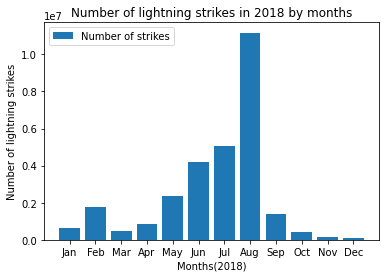

In [15]:
plt.bar(x=df_by_month['month_txt'],height= df_by_month['number_of_strikes'], label="Number of strikes")
plt.plot()

plt.xlabel("Months(2018)")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes in 2018 by months")
plt.legend()
plt.show()

# Date string manipulations with Python

## Introduction

Throughout this notebook, we will practice manipulating date strings in Python.

## Import packages and libraries


Before getting started, we will need to import all the required libraries and extensions.

In [26]:
# Import statements
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [29]:
df = pd.read_csv('/Users/tusharrao/Downloads/NOAA LS (16-18).csv')

df.head()

,date,number_of_strikes,center_point_geom
0,2016-08-05,16,POINT(-101.5 24.7)
1,2016-08-05,16,POINT(-85 34.3)
2,2016-08-05,16,POINT(-89 41.4)
3,2016-08-05,16,POINT(-89.8 30.7)
4,2016-08-05,16,POINT(-86.2 37.9)


## Create new time columns

As with similar datasets you have worked with, the `date` column data type is a string object, which limits what you can do with the data in this column. Converting the column to datetime will enable you to work with this data much more easily.  

In [30]:
# Convert the `date` column to datetime.
df['date'] = pd.to_datetime(df['date'])

Next, let's create four new columns: `week`, `month`, `quarter`, and `year`. We can do this by using the `datetime.strftime()` method of the datetime object. `strftime` is short for "string format time." We will use this method on the datetime data in the `week` column, and it will extract the information we specify, formatted as a string. 

To specify the information to extract, we will use strftime format codes. You can find a full list of available codes to use in the [strftime format codes documentation](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior). In this case, we will use `%Y` for year, `%V` for week number, `%q` for quarter.

In [31]:
# Create four new columns.
df['week'] = df['date'].dt.strftime('%Y-W%V')
df['month'] = df['date'].dt.strftime('%Y-%m')
df['quarter'] = df['date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
df['year'] = df['date'].dt.strftime('%Y')

Let's use `head()` to check that the columns were created as intended.

In [32]:
df.head(10)

,date,number_of_strikes,center_point_geom,week,month,quarter,year
0,2016-08-05,16,POINT(-101.5 24.7),2016-W31,2016-08,2016-Q3,2016
1,2016-08-05,16,POINT(-85 34.3),2016-W31,2016-08,2016-Q3,2016
2,2016-08-05,16,POINT(-89 41.4),2016-W31,2016-08,2016-Q3,2016
3,2016-08-05,16,POINT(-89.8 30.7),2016-W31,2016-08,2016-Q3,2016
4,2016-08-05,16,POINT(-86.2 37.9),2016-W31,2016-08,2016-Q3,2016
5,2016-08-05,16,POINT(-97.8 38.9),2016-W31,2016-08,2016-Q3,2016
6,2016-08-05,16,POINT(-81.9 36),2016-W31,2016-08,2016-Q3,2016
7,2016-08-05,16,POINT(-90.9 36.7),2016-W31,2016-08,2016-Q3,2016
8,2016-08-05,16,POINT(-106.6 26.1),2016-W31,2016-08,2016-Q3,2016
9,2016-08-05,16,POINT(-108 31.6),2016-W31,2016-08,2016-Q3,2016


## Plot the number of weekly lightning strikes in 2018

Next, we will plot the number of weekly lightning strikes. Let's start by filtering the original dataset to 2018. We will use the `groupby()` and `sum()` functions to get the number of strikes per week.

In [33]:
# Create a new dataframe view of just 2018 data, summed by week.
df_by_week_2018 = df[df['year'] == '2018'].groupby(['week']).sum(numeric_only=True).reset_index()
df_by_week_2018.head()

# NOTE: In pandas v.2.X+ you must set 'numeric_only=True' in the sum() function or else it will throw an error

,week,number_of_strikes
0,2018-W01,34843
1,2018-W02,353425
2,2018-W03,37132
3,2018-W04,412772
4,2018-W05,34972


Now we have a table of exactly what we need to plot the weekly lightning strike totals of 2018. We will use the `plt.bar()` function to plot the bar graph. Within the argument field, let's input the x-axis (the `week` column), then input the y-axis (or height) as the `number_of_strikes` column. 

We will use `plt.xlabel()`, `plt.ylabel()`, and `plt.title()` to add appropriate text to the graph.

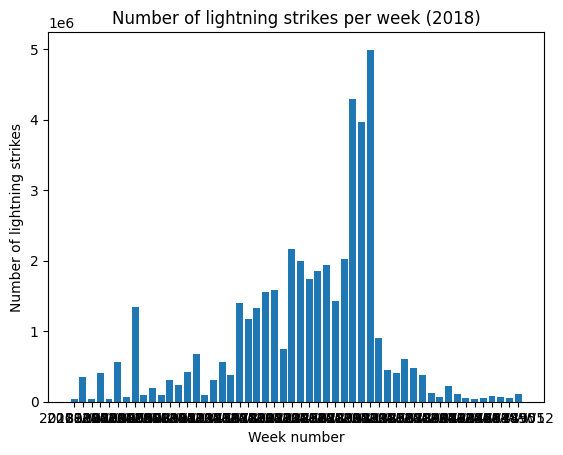

In [34]:
# Plot a bar graph of weekly strike totals in 2018.
plt.bar(x = df_by_week_2018['week'], height = df_by_week_2018['number_of_strikes'])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per week (2018)");

### Adjust the graph size

We now have a graph, but we can't read the x-axis labels. To fix this problem, first we will make it bigger by using `plt.figure(figsize=(20, 5))`. This will change the size to 20 inches wide by 5 inches tall.

Next, we will use the `plt.xticks()` function to access the tick labels on the x-axis. Using the `rotation` and `fontsize` keyword arguments, rotate the labels and make the font smaller.

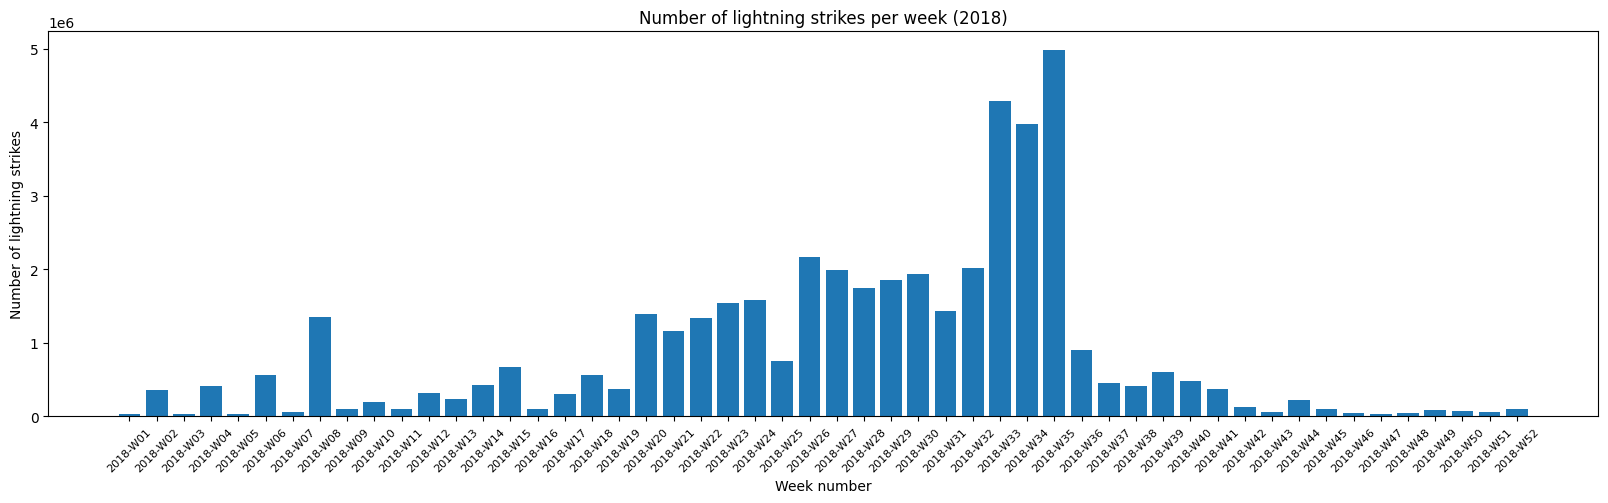

In [35]:
plt.figure(figsize = (20, 5)) # Increase output size.
plt.bar(x = df_by_week_2018['week'], height = df_by_week_2018['number_of_strikes'])
plt.plot()
plt.xlabel("Week number")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per week (2018)")
plt.xticks(rotation = 45, fontsize = 8) # Rotate x-axis labels and decrease font size.

plt.show()

## Plot the number of quarterly lightning strikes from 2016–2018

Next, let's plot lightning strikes by quarter for the full date range of available data. For a visualization, it will be easiest to work with numbers in millions, such as 25.2 million. As an example, the following code will divide the `number_of_strikes` column by one million.

In [36]:
df_by_quarter = df['number_of_strikes'].div(1000000)
df_by_quarter.head()

0    0.000016
1    0.000016
2    0.000016
3    0.000016
4    0.000016
Name: number_of_strikes, dtype: float64

### Format the numbers

This alone does not help much, because it just moved the decimal to the left. We will need to format the numbers as well.  Let's begin by grouping the data by quarter and summing.

Then, we will create a `number_of_strikes_formatted` column in the resulting dataframe by dividing by one million but also rounding to one digit after the decimal point, converting it to a string, and adding "M" to the end to represent millions.

In [37]:
# Group 2016-2018 data by quarter and sum.
df_by_quarter = df.groupby(['quarter']).sum(numeric_only=True).reset_index()

# Format as text, in millions.
df_by_quarter['number_of_strikes_formatted'] = df_by_quarter['number_of_strikes'].div(1000000).round(1).astype(str) + 'M'

df_by_quarter.head()

,quarter,number_of_strikes,number_of_strikes_formatted
0,2016-Q1,2683798,2.7M
1,2016-Q2,15084857,15.1M
2,2016-Q3,21843820,21.8M
3,2016-Q4,1969754,2.0M
4,2017-Q1,2444279,2.4M


### Add labels

Before we start plotting, let's write a function that will help label each bar in the plot with its corresponding number_of_strikes_formatted text. The function uses `plt.text()`, which is a pyplot function whose positional arguments are `x`, `y`, and `s`. `x` represents the x-axis coordinates, `y` represents the y-axis coordinates, and `s` represents the text that we want to appear at these coordinates. 

**Reference:** [pyplot documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html).

In [38]:
def addlabels(x, y, labels):
    '''
    Iterates over data and plots text labels above each bar of bar graph.
    '''
    for i in range(len(x)):
        plt.text(i, y[i], labels[i], ha = 'center', va = 'bottom')

### Plot the bar graph

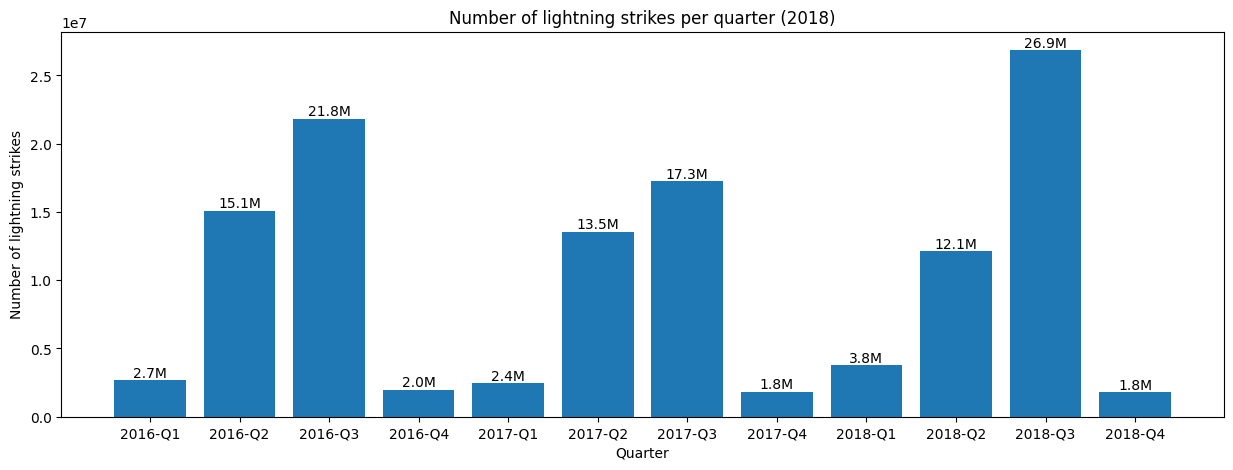

In [39]:
plt.figure(figsize = (15, 5))
plt.bar(x = df_by_quarter['quarter'], height = df_by_quarter['number_of_strikes'])
addlabels(df_by_quarter['quarter'], df_by_quarter['number_of_strikes'], df_by_quarter['number_of_strikes_formatted'])
plt.plot()
plt.xlabel('Quarter')
plt.ylabel('Number of lightning strikes')
plt.title('Number of lightning strikes per quarter (2018)')
plt.show()

### Create a grouped bar chart


Now, we will create a grouped bar chart to better compare year-over-year changes each quarter. We can do this by creating two new columns that break out the quarter and year from the `quarter` column. We will use the `quarter` column and take the last two characters to get `quarter_number`, and take the first four characters to get `year`.

In [40]:
# Create two new columns.
df_by_quarter['quarter_number'] = df_by_quarter['quarter'].str[-2:]
df_by_quarter['year'] = df_by_quarter['quarter'].str[:4]
df_by_quarter.head()

,quarter,number_of_strikes,number_of_strikes_formatted,quarter_number,year
0,2016-Q1,2683798,2.7M,Q1,2016
1,2016-Q2,15084857,15.1M,Q2,2016
2,2016-Q3,21843820,21.8M,Q3,2016
3,2016-Q4,1969754,2.0M,Q4,2016
4,2017-Q1,2444279,2.4M,Q1,2017


### Fill in the chart parameters

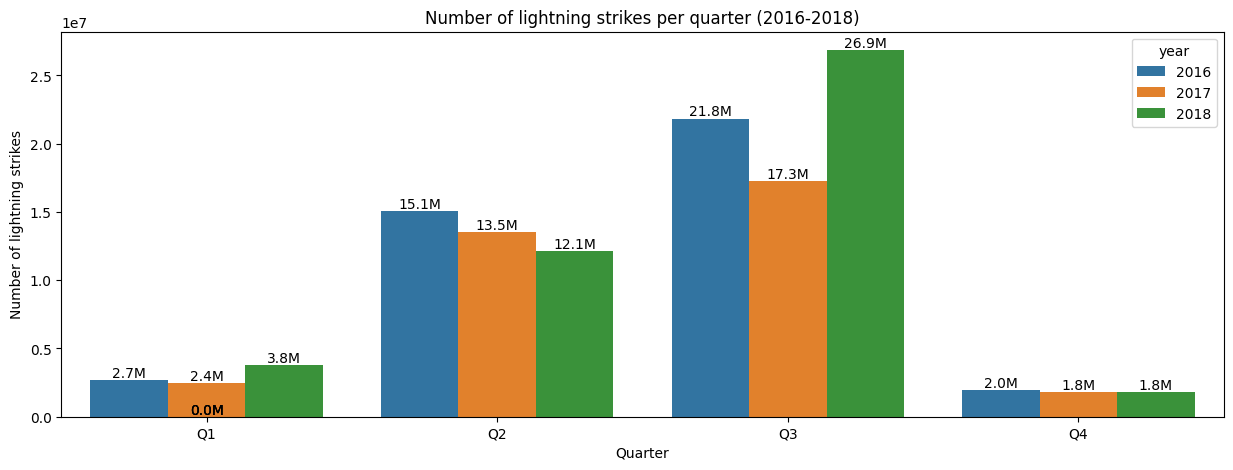

In [41]:
plt.figure(figsize = (15, 5))
p = sns.barplot(
    data = df_by_quarter,
    x = 'quarter_number',
    y = 'number_of_strikes',
    hue = 'year')
for b in p.patches:
    p.annotate(str(round(b.get_height()/1000000, 1))+'M', 
                   (b.get_x() + b.get_width() / 2., b.get_height() + 1.2e6), 
                   ha = 'center', va = 'bottom', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Quarter")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per quarter (2016-2018)")
plt.show()

# EDA structuring with Python

## Introduction

Throughout this notebook, we will practice structuring data in Python.

## Overview

In this notebook, we will examine lightning strike data collected by the National Oceanic and Atmospheric Association (NOAA) for the year of 2018. We will:

* Find the locations with the greatest number of strikes within a single day
* Examine the locations that had the greatest number of days with at least one lightning strike 
* Determine whether certain days of the week had more lightning strikes than others  
* Add data from 2016 and 2017 and, for each month, calculate the percentage of total lightning strikes for that year that occurred in that month
* Plot this data on a bar graph

In [58]:
# Import statements
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from matplotlib import pyplot as plt

In [59]:
df = pd.read_csv('/Users/tusharrao/Downloads/lightening strikes dataset.csv', sep=";")
df["date"] = pd.to_datetime(df["date"]).dt.strftime("%Y-%m-%d")
df.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


In [60]:
# Convert the `date` column to datetime.
df['date'] = pd.to_datetime(df['date']) 

In [61]:
df.shape

(1048575, 3)

Check for duplicates. If the shape of the data is different after running this code, you will know there were duplicate rows.

In [62]:
df.drop_duplicates().shape

(1048575, 3)

The shape of the dataset after dropping duplicates is the same, so you can assume there are no duplicates. Hence, there is at most one row per date, per area, and per number of strikes. 

### Locations with most strikes in a single day

To identify the locations with the most strikes in a single day, we will sort the `number_of_strikes` column in descending value, or by most to least strikes.

In [63]:
# Sort by number of strikes in descending order.
df.sort_values(by='number_of_strikes', ascending=False).head(10)

,date,number_of_strikes,center_point_geom
302758,2018-08-20,2211,POINT(-92.5 35.5)
278383,2018-08-16,2142,POINT(-96.1 36.1)
280830,2018-08-17,2061,POINT(-90.2 36.1)
280453,2018-08-17,2031,POINT(-89.9 35.9)
278382,2018-08-16,1902,POINT(-96.2 36.1)
11517,2018-02-10,1899,POINT(-95.5 28.1)
277506,2018-08-16,1878,POINT(-89.7 31.5)
24906,2018-02-25,1833,POINT(-98.7 28.9)
284320,2018-08-17,1767,POINT(-90.1 36)
24825,2018-02-25,1741,POINT(-98 29)


### Locations with most days with at least one lightning strike


To find the number of days that a given geographic location had at least one lightning strike, we will use the `value_counts()` function on the `center_point_geom` column. The logic is that if each row represents a location-day, then counting the number of times each location occurs in the data will give you the number of days that location had lightning. 

In [64]:
# Identify the locations that appear most in the dataset.
df.center_point_geom.value_counts()

center_point_geom
POINT(-82.3 22.9)    52
POINT(-82.5 22.9)    50
POINT(-81.9 22.9)    49
POINT(-82.4 22.9)    49
POINT(-82.1 22.9)    48
                     ..
POINT(-66.3 47.7)     1
POINT(-64.9 47.7)     1
POINT(-64.8 47.7)     1
POINT(-68.1 47.5)     1
POINT(-92.5 50.8)     1
Name: count, Length: 157079, dtype: int64

The locations with the most days with lightning strikes had at least one strike on 108 days—nearly one out of every three days of the year. These locations are all rather close to each other geographically. Notice also that the `value_counts()` function automatically sorts the results in descending order. 

Now we will examine whether there is an even distribution of values, or whether 108 strikes is an unusually high number of days with lightning strikes. We will use the `value_counts()` function again, but this time we will output the top 20 results. We will also rename the columns and apply a color gradient.

In [65]:
# Identify the top 20 locations with most days of lightning.
df.center_point_geom.value_counts()[:20].rename_axis('unique_values').reset_index(name='counts').style.background_gradient()

,unique_values,counts
0,POINT(-82.3 22.9),52
1,POINT(-82.5 22.9),50
2,POINT(-81.9 22.9),49
3,POINT(-82.4 22.9),49
4,POINT(-82.1 22.9),48
5,POINT(-82.7 22.9),47
6,POINT(-82 22.9),47
7,POINT(-82.4 23),46
8,POINT(-81.9 23),46
9,POINT(-84.1 22.5),45


###  Lightning strikes by day of week

One useful grouping is categorizing lightning strikes by day of the week, which will tell us whether any particular day of the week had fewer or more lightning strikes than others. To calculate this, we will take advantage of the fact that the data in our `date` column is of the `datetime` class. Because these entries are datetime objects, we can extract date-related information from them and create new columns.

First, we will create a column called `week` using `dt.isocalendar()` on the `date` column. This function is designed to be used on a pandas series, and it will return a new dataframe with year, week, and day columns. The information is formatted numerically; for example, January 3, 1950, would be represented as:

| Year | Week | Day |
| ---- | :--: | :-: |
| 1950 | 1    | 3   |

Because we only want to extract the week number, we will add `.week` to the end. You can learn more about `dt.isocalendar()` in the [pandas.Series.dt.isocalendar documentation](https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.Series.dt.isocalendar.html).

We will also add a `weekday` column using `dt.day_name()`. This is another pandas function designed to be used on a pandas series. It extracts the text name of the day for any given datetime date. You can learn more about this function in the [pandas.Series.dt.day_name documentation](https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.Series.dt.day_name.html).


In [66]:
# Create two new columns.
df['week'] = df.date.dt.isocalendar().week
df['weekday'] = df.date.dt.day_name()
df.head()

,date,number_of_strikes,center_point_geom,week,weekday
0,2018-01-03,194,POINT(-75 27),1,Wednesday
1,2018-01-03,41,POINT(-78.4 29),1,Wednesday
2,2018-01-03,33,POINT(-73.9 27),1,Wednesday
3,2018-01-03,38,POINT(-73.8 27),1,Wednesday
4,2018-01-03,92,POINT(-79 28),1,Wednesday


Now, we can calculate the mean number of lightning strikes for each weekday of the year. We will use the `groupby()` function to do this.

In [67]:
# Calculate the mean count of lightning strikes for each weekday.
df[['weekday','number_of_strikes']].groupby(['weekday']).mean()

,number_of_strikes
weekday,
Friday,28.627467
Monday,27.043681
Saturday,25.514794
Sunday,24.334392
Thursday,29.206090
Tuesday,27.919478
Wednesday,28.531910


It seems that Saturday and Sunday have fewer lightning strikes on average than the other five weekdays. We will plot the distributions of the strike counts for each day of the week. We want each distribution to be represented as a boxplot. 

We will begin by defining the order of the days, starting with Monday and ending with Sunday. This is how the days will be ordered in the plot we create.

In [68]:
# Define order of days for the plot.
weekday_order = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']

Now, we will code the plot. Remember that `showfliers` is the parameter that controls whether or not outliers are displayed in the plot. If we input `True`, outliers are included; if we input `False`, outliers are left off of the box plot. Keep in mind, we aren’t *deleting* any outliers from the dataset when we create this chart—we are only excluding them from the visualization.

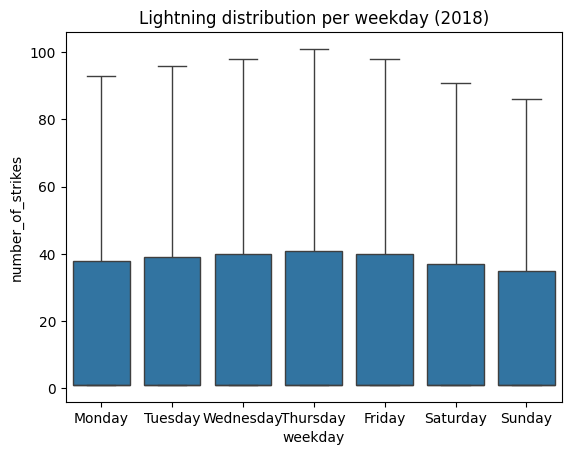

In [69]:
# Create boxplots of strike counts for each day of week.
g = sns.boxplot(data=df, 
            x='weekday',
            y='number_of_strikes', 
            order=weekday_order, 
            showfliers=False 
            );
g.set_title('Lightning distribution per weekday (2018)');

Notice that the median remains the same on all of the days of the week. As for Saturday and Sunday, however, the distributions are *both* lower than they are during the rest of the week. We also know that the mean numbers of strikes that occurred on Saturday and Sunday were lower than on the other weekdays. Why might this be? Perhaps the aerosol particles emitted by factories and vehicles increase the likelihood of lightning strikes. In the U.S., Saturday and Sunday are days that many people don't work, so there may be fewer factories operating and fewer cars on the road. This is only speculation, but it's one possible path for further exploration. 

### Monthly lightning strikes 2016–2018

Finally, we will examine monthly lightning strike data from 2016–2018. We will calculate the percentage of total lightning strikes for each year that occurred in a given month. We will then plot this data on a bar graph.

In [56]:
df_2 = pd.read_csv('/Users/tusharrao/Downloads/NOAA LS (16-18).csv')

df_2.head()

,date,number_of_strikes,center_point_geom
0,2016-08-05,16,POINT(-101.5 24.7)
1,2016-08-05,16,POINT(-85 34.3)
2,2016-08-05,16,POINT(-89 41.4)
3,2016-08-05,16,POINT(-89.8 30.7)
4,2016-08-05,16,POINT(-86.2 37.9)


In [57]:
# Convert `date` column to datetime.
df_2['date'] = pd.to_datetime(df_2['date'])

Now we can combine the 2016–2017 dataframe with the 2018 dataframe. There are several functions that can do this. We will use `concat()`. Remember that the 2018 data has two added columns: `week` and `weekday`. To simplify the results of our combined dataframe, we will drop these added columns during the concatenation. Note that the following code doesn't permanently modify `df`. The columns drop only for this operation. You can learn more about the `concat()` function in the [pandas.concat documentation](https://pandas.pydata.org/docs/reference/api/pandas.concat.html).

In [70]:
# Create a new dataframe combining 2016–2017 data with 2018 data.
union_df = pd.concat([df.drop(['weekday','week'],axis=1), df_2], ignore_index=True)
union_df.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


To help us name the bars of the bar plot, we will create three new columns that isolate the year, month number, and month name. 

In [71]:
# Add 3 new columns.
union_df['year'] = union_df.date.dt.year
union_df['month'] = union_df.date.dt.month
union_df['month_txt'] = union_df.date.dt.month_name()
union_df.head()

,date,number_of_strikes,center_point_geom,year,month,month_txt
0,2018-01-03,194,POINT(-75 27),2018,1,January
1,2018-01-03,41,POINT(-78.4 29),2018,1,January
2,2018-01-03,33,POINT(-73.9 27),2018,1,January
3,2018-01-03,38,POINT(-73.8 27),2018,1,January
4,2018-01-03,92,POINT(-79 28),2018,1,January


Let's check the overall lightning strike count for each year.

In [72]:
# Calculate total number of strikes per year
union_df[['year','number_of_strikes']].groupby(['year']).sum()

,number_of_strikes
year,
2016,41582229
2017,35095195
2018,73186949


Now we will calculate the percentage of total lightning strikes that occurred in a given month for each year and assign the results to a new dataframe called `lightning_by_month`. 

In [74]:
# Calculate total lightning strikes for each month of each year.
lightning_by_month = union_df.groupby(['month_txt','year']).agg(
    number_of_strikes = pd.NamedAgg(column='number_of_strikes',aggfunc=sum)
    ).reset_index()

lightning_by_month.head()

/var/folders/60/94mdf1wj07xdm6ljn56vm7mm0000gn/T/ipykernel_1712/4141918718.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  lightning_by_month = union_df.groupby(['month_txt','year']).agg(


,month_txt,year,number_of_strikes
0,April,2016,2636427
1,April,2017,3819075
2,April,2018,2400952
3,August,2016,7250442
4,August,2017,6021702


We can use the `agg()` function to calculate the same yearly totals we found before, with 2017 having fewer strikes than the other two years.

In [75]:
# Calculate total lightning strikes for each year.
lightning_by_year = union_df.groupby(['year']).agg(
  year_strikes = pd.NamedAgg(column='number_of_strikes',aggfunc=sum)
).reset_index()

lightning_by_year.head()

/var/folders/60/94mdf1wj07xdm6ljn56vm7mm0000gn/T/ipykernel_1712/1371192814.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  lightning_by_year = union_df.groupby(['year']).agg(


,year,year_strikes
0,2016,41582229
1,2017,35095195
2,2018,73186949


In our bar plot, we need to use the monthly totals to calculate percentages. For each month, we will need the monthly total strike count and the total strike count for that year. Let's create another dataframe called `percentage_lightning` that adds a new column called `year_strikes` which represents the total number of strikes for each year. We can do this using the `merge()` function. We will merge the `lightning_by_month` dataframe with the `lightning_by_year` dataframe, specifying to merge on the `year` column. This means that wherever the `year` columns contain the same value in both dataframes, a row is created in our new dataframe with all the other columns from both dataframes being merged. To learn more about this function, refer to the [pandas.merge documentation](https://pandas.pydata.org/docs/reference/api/pandas.merge.html).


In [76]:
# Combine `lightning_by_month` and `lightning_by_year` dataframes into single dataframe.
percentage_lightning = lightning_by_month.merge(lightning_by_year,on='year')
percentage_lightning.head()

,month_txt,year,number_of_strikes,year_strikes
0,April,2016,2636427,41582229
1,April,2017,3819075,35095195
2,April,2018,2400952,73186949
3,August,2016,7250442,41582229
4,August,2017,6021702,35095195


Now we will create a new column in our new dataframe that represents the percentage of total lightning strikes that occurred during each month for each year. We will do this by dividing the `number_of_strikes` column by the `year_strikes` column and multiplying the result by 100.

In [77]:
# Create new `percentage_lightning_per_month` column.
percentage_lightning['percentage_lightning_per_month'] = (percentage_lightning.number_of_strikes/
                                                          percentage_lightning.year_strikes * 100.0)
percentage_lightning.head()

,month_txt,year,number_of_strikes,year_strikes,percentage_lightning_per_month
0,April,2016,2636427,41582229,6.340273
1,April,2017,3819075,35095195,10.882045
2,April,2018,2400952,73186949,3.280574
3,August,2016,7250442,41582229,17.436396
4,August,2017,6021702,35095195,17.158195


Now we can plot the percentages by month in a bar graph.

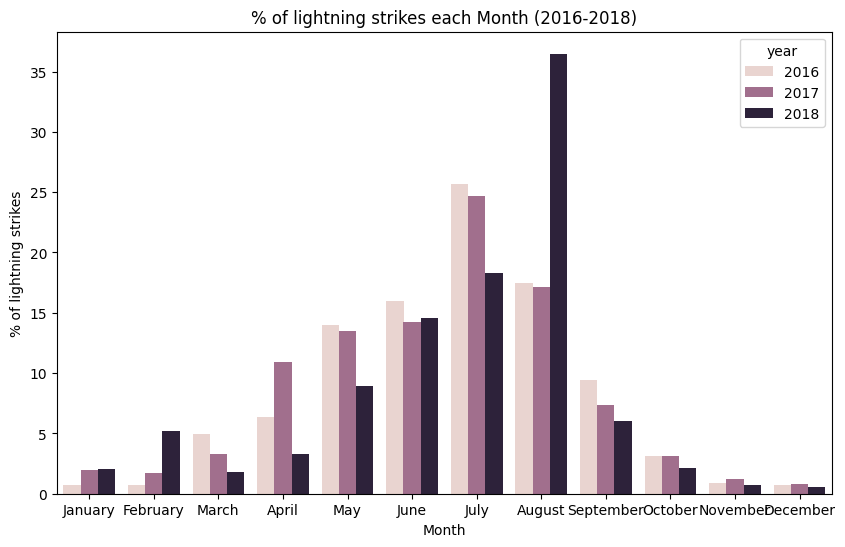

In [78]:
plt.figure(figsize=(10,6));

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

sns.barplot(
    data = percentage_lightning,
    x = 'month_txt',
    y = 'percentage_lightning_per_month',
    hue = 'year',
    order = month_order );
plt.xlabel("Month");
plt.ylabel("% of lightning strikes");
plt.title("% of lightning strikes each Month (2016-2018)");

For all three years, there is a clear pattern over the course of each year. One month stands out: August. More than one third of the lightning strikes in 2018 happened in August. 